# Line Fitting Using Polynomial

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl

Generate some data

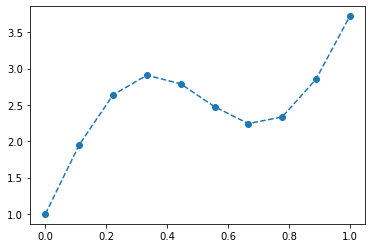

In [2]:
x_data = np.linspace(0, 1, 10)
y_data = 3 * x_data + np.sin(6*x_data) + 1.

pl.plot(x_data, y_data, '--o');

# Model and its parameters

**Compute the power series of $x$**

In [8]:
K = 5
def series(x):
    powers = np.zeros((len(x), K+1))
    for i in range(K+1):
        powers[:, i] = np.power(x, i)
    return powers

**Model and parameters**

$$f(x) = \sum_{i=0}^k a_i x^i $$

The model parameters will be:

$$\theta = [a_0, a_1, \dots, a_k]$$

In [12]:
theta = [
    tf.Variable(np.random.randn(K+1, 1), dtype=tf.float64)
]

def f(x):
    w = theta[0]
    return tf.squeeze(series(x) @ w)

# Loss Function

We will use a TensorFlow built-in loss function.

```
loss(y_true, y_pred)
```

In [14]:
loss = tf.keras.losses.MeanSquaredError()

# Optimizer

We can use a built-in optimizer.

All TensorFlow optimizers have a method:

```
optimizer.apply_gradients([
    (grad_1, var_1),
    (grad_2, var_2),
    ...
    (grad_n, var_n),
])
```

In [16]:
optimizer = tf.keras.optimizers.Adam()

In [19]:
## To illustrate now an optimizer works
L0 = loss(y_data, f(x_data))
print("L0 =", L0)

with tf.GradientTape() as tape:
    L = loss(y_data, f(x_data))

grads = tape.gradient(L, theta)
optimizer.apply_gradients(zip(grads, theta))

L = loss(y_data, f(x_data))
print("L =", L)

L0 = tf.Tensor(7.698572635650635, shape=(), dtype=float64)
L = tf.Tensor(7.684348106384277, shape=(), dtype=float64)


# Training

In [25]:
def train(epochs):
    # initialize the model parameters
    theta[0].assign(np.random.randn(K+1, 1))
    
    # Training loop
    for i in range(epochs):
        with tf.GradientTape() as tape:
            L = loss(y_data, f(x_data))
        grads = tape.gradient(L, theta)
        optimizer.apply_gradients(zip(grads,theta))
        
        if(i % (epochs // 10)) == 0:
            L = loss(y_data, f(x_data))
            print("[%.2d] %.2f" % (i, L))

train(20000)

[00] 5.32
[2000] 0.20
[4000] 0.18
[6000] 0.15
[8000] 0.10
[10000] 0.06
[12000] 0.03
[14000] 0.02
[16000] 0.02
[18000] 0.01


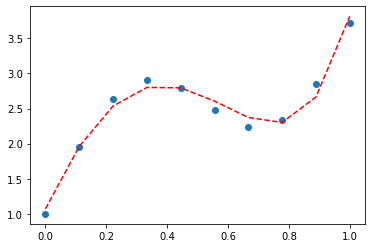

In [26]:
pl.plot(x_data, y_data, 'o')
pl.plot(x_data, f(x_data), '--', color='red');